In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns; sns.set(style="white", color_codes=True)
%matplotlib inline

In [2]:
class Generator(torch.nn.Module):
    def __init__(self, in_features, out_features):
        super(Generator, self).__init__()
        self.l1_size = 100
        self.l2_size = 100
        self.relu = torch.nn.ReLU()
        self.l1 = torch.nn.Linear(in_features, self.l1_size)
        self.l2 = torch.nn.Linear(self.l1_size, self.l2_size)
        self.l3 = torch.nn.Linear(self.l2_size, out_features)
        
    def forward(self,z):
        
        a1 = self.relu(self.l1(z))
        a2 = self.relu(self.l2(a1))
        a3 = self.l3(a2)
        return a3
    
    
class Discriminator(torch.nn.Module):
    def __init__(self, in_features, out_features):
        super(Discriminator, self).__init__()
        self.l1_size = 100
        self.l2_size = 100
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.l1 = torch.nn.Linear(in_features, self.l1_size)
        self.l2 = torch.nn.Linear(self.l1_size, self.l2_size)
        self.l3 = torch.nn.Linear(self.l2_size, out_features)
        
    def forward(self, x):
        a1 = self.relu(self.l1(x))
        a2 = self.relu(self.l2(a1))
        a3 = self.l3(a2)
        return a3
    
    def forward_with_sigmoid(self, x):
        return self.sigmoid(self.forward(x))

In [3]:
cov = 0.2*np.eye(2)+0.8
x_real = np.random.multivariate_normal(np.ones(2)*5, cov, size=2000)

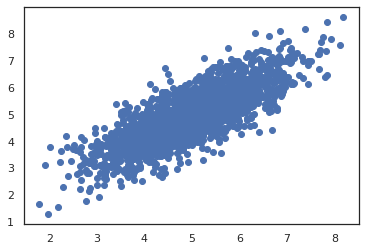

In [4]:
plt.scatter(x_real[:, 0], x_real[:,1])

In [5]:
G = Generator(2,2)
D = Discriminator(2,1)
G_opt = torch.optim.Adam(G.parameters(), lr=0.001)
D_opt = torch.optim.Adam(D.parameters(), lr=0.001)

x_t_real = torch.from_numpy(x_real).float()
#y = torch.from_numpy(np.concatenate([np.zeros(2000), np.ones(2000)])).float().reshape(-1,1)
for i in tqdm(range(8000)):
    for i in range(5):
        ind = np.arange(x_real.shape[0])
        mask = np.random.choice(ind, 50)
        x_real_batch = torch.from_numpy(x_real[mask]).float()

        z = torch.from_numpy(np.random.normal(size=x_real_batch.shape)).float()
        x_fake = G.forward(z)
        X = torch.cat([x_fake, x_real_batch])
        y_hat = D.forward(X)
        y = torch.from_numpy(
            np.concatenate([np.zeros((x_real_batch.shape[0],1)), np.ones((x_real_batch.shape[0],1))])).float()
        
        G_opt.zero_grad()
        D_opt.zero_grad()
        Dloss = torch.nn.functional.binary_cross_entropy_with_logits(y_hat, y)
        Dloss.backward()
        D_opt.step()
    
    
    z = torch.from_numpy(np.random.normal(size=x_real_batch.shape)).float()
    x_fake = G.forward(z)
    y_hat = D.forward(x_fake)
    
    D_opt.zero_grad()
    G_opt.zero_grad()
    Gloss = torch.nn.functional.binary_cross_entropy_with_logits(y_hat, torch.ones_like(y_hat))
    Gloss.backward()
    G_opt.step()

  0%|          | 0/8000 [00:00<?, ?it/s]/home/demir/anaconda3/envs/pDL/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(
100%|██████████| 8000/8000 [01:34<00:00, 84.33it/s]


In [6]:
z = torch.from_numpy(np.random.normal(size=(2000,2))).float()
x_fake = G.forward(z).data.numpy()

In [7]:
x_fake[:5]

array([[3.1833363, 2.7396398],
       [6.5726423, 6.31377  ],
       [4.1121693, 4.2451   ],
       [4.972576 , 4.7108707],
       [4.1980867, 4.553558 ]], dtype=float32)

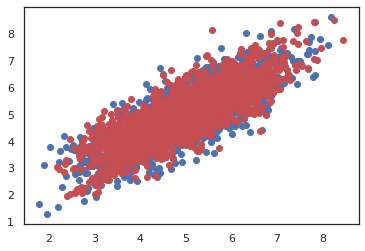

In [8]:
plt.scatter(x_real[:, 0], x_real[:,1])
plt.scatter(x_fake[:,0], x_fake[:,1], c='r')

/home/demir/anaconda3/envs/pDL/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


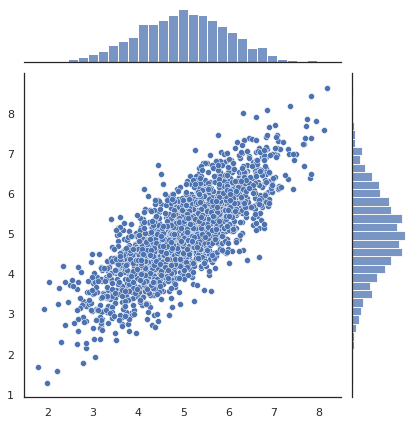

In [9]:
sns.jointplot(x_real[:,0], x_real[:,1])

/home/demir/anaconda3/envs/pDL/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


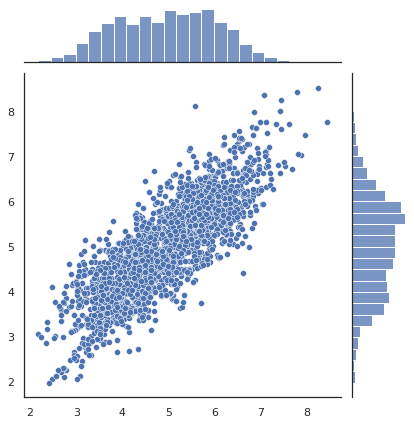

In [10]:
sns.jointplot(x_fake[:,0], x_fake[:,1])